<a href="https://colab.research.google.com/github/AlumiK/tensorflow-notebooks/blob/main/TensorFlow2/07_cnn_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
!/opt/bin/nvidia-smi

Thu Oct  8 08:19:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
K = len(set(y_train.flatten()))

170500096/170498071 [==============================] - 6s 0us/step


Epoch 1/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5159 - accuracy: 0.4510 - val_loss: 1.2337 - val_accuracy: 0.5601
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1826 - accuracy: 0.5780 - val_loss: 1.0868 - val_accuracy: 0.6161
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0323 - accuracy: 0.6343 - val_loss: 1.0101 - val_accuracy: 0.6408
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9281 - accuracy: 0.6712 - val_loss: 0.9490 - val_accuracy: 0.6652
Epoch 5/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8499 - accuracy: 0.7014 - val_loss: 0.9120 - val_accuracy: 0.6814
Epoch 6/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7684 - accuracy: 0.7269 - val_loss: 0.8974 - val_accuracy: 0.6853
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6953 - accuracy: 0.7552 - val_loss: 0.8880 - val_ac

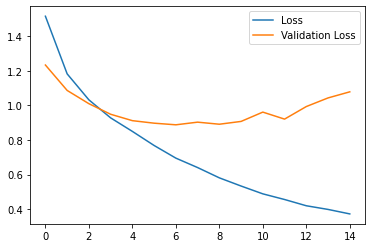

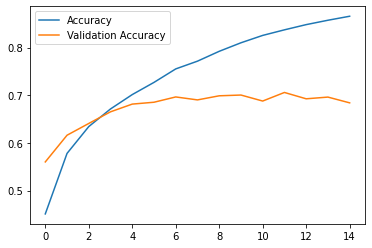

313/313 [==============================] - 1s 3ms/step - loss: 1.0787 - accuracy: 0.6840
Accuracy: 0.6840000152587891


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),
    tf.keras.layers.Conv2D(32, (3, 3), strides=2, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(K, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Plot the confusion matrix

Confusion matrix, without normalization
[[723  22  47  19  12   6   9   7 119  36]
 [ 15 809   8   8   2   9  12   1  47  89]
 [ 73   9 622  68  45  61  62  21  27  12]
 [ 22  15  95 480  39 201  65  30  32  21]
 [ 27   6 129  92 524  73  56  61  28   4]
 [ 15   7  77 179  24 615  28  34  17   4]
 [  5  10  59  73  22  42 756  11  17   5]
 [ 18   2  44  48  44  94   8 710   9  23]
 [ 40  33  10  14   6   4   7   6 869  11]
 [ 34 116  15  21   2  13   8  16  43 732]]


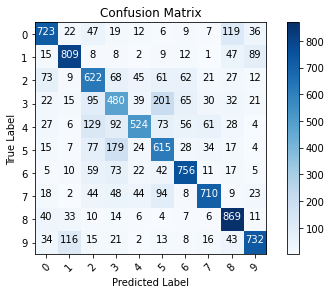

In [5]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print('Normalized confusion matrix')
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment='center',
               color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(K)))

## Display a random misclassified image

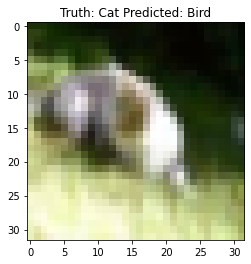

In [6]:
labels = [
    'Airplane', 
    'Automobile',
    'Bird',
    'Cat',
    'Deer',
    'Dog',
    'Frog',
    'Horse',
    'Ship',
    'Truck',
]
misclassified_idx = np.where(p_test != y_test)[0]
i =  np.random.choice(misclassified_idx)
plt.imshow(X_test[i])
plt.title(f'Truth: {labels[y_test[i]]} Predicted: {labels[p_test[i]]}')
plt.show()